In [1]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import spacy
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score

In [4]:
dataset = pd.read_csv("dataset.csv")
print(len(dataset.columns))
#dataset.head(2)

21


In [5]:

dataset['Unnamed: 0']
new_df =dataset.drop(columns=['Unnamed: 0'])
new_df.head(1)

columns = new_df.columns
columns_vect = columns.values
# for index,col in enumerate(columns_vect):
#     print(index,col)


final = pd.DataFrame(columns=['Text','Author'])
dict ={}
for vect in columns_vect:
    #print(vect)
    for i in new_df[vect]:
        dict[vect] =i
        final =final.append({'Text':i,'Author':vect},ignore_index=True)
        

In [6]:
final.tail(5)

,Text,Author
395,"my pass-key,' says John. 'The deuce you had!'...",Robert Louis Stevenson
396,"indissuadably pursue its own calling. Yet, so ...",Robert Louis Stevenson
397,"nude, and bearing in his hand the sacrificial ...",Robert Louis Stevenson
398,"adventurer crossed the threshold, than the doo...",Robert Louis Stevenson
399,heaven. The stars seemed to expand and emit a ...,Robert Louis Stevenson


## SOME NLTK FOR DATASET EXPLORATION


In [7]:
import os
import nltk as nltk
from nltk.tag.stanford import StanfordPOSTagger 
ps = nltk.stem.PorterStemmer()

cale_model="/home/calin/anca/stanford-postagger-full-2018-10-16/stanford-postagger.jar"
cale_jar_tagger = "/home/calin/anca/stanford-postagger-full-2018-10-16/models/english-bidirectional-distsim.tagger"
tagger=StanfordPOSTagger(cale_jar_tagger,cale_model) 
os.path.exists(cale_model)

True

In [41]:
def join_text(tokens):
    doc = ' '.join(tokens)
    return doc

In [13]:
def tokenize_text(text):
    words = nltk.word_tokenize(text)
    words=[word.lower() for word in words if word.isalpha()]
    words = [ps.stem(word) for word in words]  
    return words

In [9]:
def extract_morpho_proportion(text):
    
    words = tokenize_text(text)
    
    d = {}
    proportii = {}
    parti_vorbire = set()

    #stanford tagger magic
    result = tagger.tag(words[:100])

    for (i,j) in result:
        parti_vorbire.add(j)

    for k in parti_vorbire:
        d.setdefault(k, [])

    for (i,j) in result:
         d[j].append(i)
    
    print(len(words))

    for k in d:
        #print(len(d[k]))
        proportii[k] = len(d[k])/len(words)
    
    print(proportii)

In [ ]:
#print(len(final.iloc[7]['Text']))

In [ ]:
#dict_morpho_proportion = extract_morpho_proportion(final.iloc[3]['Text'])

### Analiza sintactica NLTK/ SPACY

In [10]:


inFile = open('all_sentence_parts_upen.txt', 'r')
sentence_parts = [line.rstrip('\n') for line in inFile]
print(sentence_parts)
proportions_dataframe = pd.DataFrame(columns=sentence_parts)
proportions_dataframe.head()
print(sentence_parts)

['CC ', 'CD ', 'DT ', 'EX', 'FW ', 'IN ', 'JJ ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP ', 'PRP$ ', 'RB ', 'RBR ', 'RBS ', 'RP ', 'SYM ', 'TO', 'UH ', 'VB ', 'VBD ', 'VBG ', 'VBN ', 'VBP ', 'VBZ ', 'WDT ', 'WP ', 'WP$ ', 'WRB ']
['CC ', 'CD ', 'DT ', 'EX', 'FW ', 'IN ', 'JJ ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP ', 'PRP$ ', 'RB ', 'RBR ', 'RBS ', 'RP ', 'SYM ', 'TO', 'UH ', 'VB ', 'VBD ', 'VBG ', 'VBN ', 'VBP ', 'VBZ ', 'WDT ', 'WP ', 'WP$ ', 'WRB ']


In [11]:

#proportions_dataframe
copie_rezerva = final
copie_rezerva.head()

,Text,Author
0,"arm, she seemed to have left behind her the fr...",Bret Harte
1,"election poster, and sauntered down towards th...",Bret Harte
2,to the uneasiness of both parties--and contras...,Bret Harte
3,directed to the young spirited near horse he w...,Bret Harte
4,indication I had received of Miss Mannersley's...,Bret Harte


Tokenization of the texts took centuries so after doing it, I saved the output into a file, in order to just read afterwards.

In [14]:

%%time

final['Text'] =final.apply(lambda row:tokenize_text(row['Text']),axis =1)
final.to_csv("back_up.csv", encoding='utf-8', index=False)
final.head()

CPU times: user 17min 27s, sys: 1.56 s, total: 17min 29s
Wall time: 17min 30s


In [18]:
final.to_csv("tokenizat_stemming.csv", encoding='utf-8', index=False)
final.head()

,Text,Author
0,"[arm, she, seem, to, have, left, behind, her, ...",Bret Harte
1,"[elect, poster, and, saunter, down, toward, th...",Bret Harte
2,"[to, the, uneasi, of, both, parti, and, contra...",Bret Harte
3,"[direct, to, the, young, spirit, near, hors, h...",Bret Harte
4,"[indic, i, had, receiv, of, miss, mannersley, ...",Bret Harte


In [42]:
final['Text'] =final.apply(lambda row:join_text(row['Text']),axis =1)

In [43]:
final.head()

,Text,Author
0,arm she seem to have left behind her the frank...,Bret Harte
1,elect poster and saunter down toward the offic...,Bret Harte
2,to the uneasi of both parti and contrast it wi...,Bret Harte
3,direct to the young spirit near hors he wa dri...,Bret Harte
4,indic i had receiv of miss mannersley advanc i...,Bret Harte


In [ ]:
#df.iat[0,df_row_merged.columns.get_loc("Author")]="Anca"

In [ ]:
df_row_merged = pd.concat([final, proportions_dataframe], ignore_index=True,sort=False)

In [ ]:
df_row_merged.head()


In [ ]:
# doc = nlp("Next week I'll be in Madrid. \n Let's hope everything goes according to plan!")
# print([(token.text, token.tag_) for token in doc])
# unique, counts = np.unique(np.array([token.tag_ for token in doc]), return_counts=True)
# pd.DataFrame(data=[counts], columns=unique)

In [ ]:
df_row_merged.dataset_clean2.iat[index, dataset_clean2.columns.get_loc(key)] = value

In [ ]:
# doc = nlp(final.iloc[0]['Text'][:100])
# print([(token.text, token.tag_) for token in doc])
# unique, counts = np.unique(np.array([token.tag_ for token in doc]), return_counts=True)
# pd.DataFrame(data=[counts], columns=unique)
# n=sum(counts)
# #print(sum(counts))
# counts =[c/n for c in counts]
# lista_proportii=list(zip(unique,counts))
# for i,j in lista_proportii:
#     print(i,j)
#     df_row_merged.dataset_clean2.iat[index, dataset_clean2.columns.get_loc(key)] = value
#     final.iloc[0][i] =j
# # df_out = pd.concat([proportions_dataframe,pd.DataFrame(data=[counts], columns=unique)],sort=True)
# # df_out.fillna(0)
# # df_out.head()

In [ ]:
print(len(df_row_merged))

### I tried to extract the proportion of nouns,verbs,determinants in the texts, but no matter what tagger i use, either nltk with Standford Post Tagge or spacy Tagger it keeps giving me a memory error :(

In [ ]:


%%time
# for i in range(len(df_row_merged)):
#     df_row_merged.iloc[i]['Text']
nlp = spacy.load('en')

for i in range(100):
    #print(i,final.iloc[i]['Text'][:10])
    doc = nlp(final.iloc[i]['Text'])
    #print([(token.text, token.tag_) for token in doc])
    unique, counts = np.unique(np.array([token.tag_ for token in doc]), return_counts=True)
    pd.DataFrame(data=[counts], columns=unique)
    n=sum(counts)
    #print(sum(counts))
    counts =[c/n for c in counts]
    lista_proportii=list(zip(unique,counts))
    for key,val in lista_proportii:
        if key in sentence_parts:
            #print(key,val)
            df_row_merged.iat[i, df_row_merged.columns.get_loc(key)] = val

    


In [ ]:
df_row_merged.head()

In [ ]:
def write_proportion_values(row):
    
    d = {}
    proportii = {}
    parti_vorbire = set()

    #stanford tagger magic
    result = tagger.tag(row)

    for (i,j) in result:
        parti_vorbire.add(j)

    for k in parti_vorbire:
        d.setdefault(k, [])

    for (i,j) in result:
         d[j].append(i)
    
    print(len(words))

    for k in d:
        #print(len(d[k]))
        proportii[k] = len(d[k])/len(words)
    
    print(proportii)
    

# df_row_merged =df_row_merged['Text'].apply(lambda row : write_proportion_values(row))
# df_row_merged.head()   
#df_row_merged.iloc[0]['Text']
# write_proportion_values(df_row_merged.iloc[0]['Text'])

## Get X, Y

In [44]:

X,Y = final[final.columns[:-1]], final[final.columns[-1:]]

# FEATURE EXTRACTION



### 1.1.1 Text Embedding



After using CountVectorizer() I realised I was obtaining very low accuracy scores so I switched to TFIDF Vectorizer instead.

In [ ]:
%%time
#Merge asta de nu se mai poate :))
# count_vect = CountVectorizer()
# dataset_cv = count_vect.fit_transform(X['Text'])
# print(dataset_cv.shape)
# vocabulary = vectorizer.get_feature_names()
# print(vocabulary[:10])
# print(vocabulary[-10:])

# vec = CountVectorizer().fit(final.iloc[18]['Text'])
# bag_of_words = vec.transform(final.iloc[18]['Text'])
# sum_words = bag_of_words.sum(axis=0) 
# words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
# words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
# print(words_freq[:20])

#print(vec.vocabulary_)

In [ ]:
#print(vec.vocabulary_)

## TFIDFVectorizer

In [39]:
X.head()

,Text
0,"[arm, she, seem, to, have, left, behind, her, ..."
1,"[elect, poster, and, saunter, down, toward, th..."
2,"[to, the, uneasi, of, both, parti, and, contra..."
3,"[direct, to, the, young, spirit, near, hors, h..."
4,"[indic, i, had, receiv, of, miss, mannersley, ..."


In [45]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english',token_pattern=r'(?u)\b[A-Za-z]+\b')
X_tfidf = vectorizer.fit_transform(X['Text'])
# vocabulary = vectorizer.get_feature_names()
# print(vocabulary[:10])
# print(vocabulary[-10:])

CPU times: user 25 s, sys: 40 ms, total: 25.1 s
Wall time: 25.1 s


In [127]:
#print(X_tfidf)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y, test_size=0.2, stratify = Y, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## Text Classification

In [48]:
simple_svc_clf = SVC()
simple_svc_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
print(simple_svc_clf.score(X_train,y_train))
print(simple_svc_clf.score(X_test,y_test))

0.95
0.7625


In [50]:
%%time

param_grid = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf','linear']},
 ]



grid_search = GridSearchCV(simple_svc_clf,param_grid, cv = 5)
grid_search.fit(X_train,y_train)
print("Best params found: ",grid_search.best_params_)
predictions = grid_search.predict(X_test)
print(classification_report(y_test,predictions))

Best params found:  {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
                             precision    recall  f1-score   support

                 Bret Harte       1.00      1.00      1.00         4
             Charles Darwin       1.00      1.00      1.00         4
           Charles Kingsley       1.00      1.00      1.00         4
     Frank Richard Stockton       1.00      1.00      1.00         4
                Henry James       1.00      1.00      1.00         4
        Henry Rider Haggard       1.00      1.00      1.00         4
       Herbert George Wells       1.00      1.00      1.00         4
                Jack London       1.00      1.00      1.00         4
               Jacob Abbott       1.00      1.00      1.00         4
      James Fenimore Cooper       1.00      1.00      1.00         4
                John Bunyan       1.00      1.00      1.00         4
                John Ruskin       1.00      1.00      1.00         4
                 Lord Byron       1.

In [53]:
print("Best params found: ",grid_search.best_params_)
predictions = grid_search.predict(X_test)
# print(classification_report(y_test,predictions))
print("Score train:",grid_search.score(X_train,y_train))
print("Score test:",grid_search.score(X_test,y_test))

Best params found:  {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Score train: 1.0
Score test: 1.0


Using GridSearchCv to find the best hyperparamters to optimise the accuracy score I have come to:
    Best params found:  {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Since the scores obtained both on train and test are 100%, the goal has been reached

In [54]:

svc_clf = LinearSVC()
svc_clf.fit(X_train,y_train)

print(svc_clf.score(X_train,y_train))
print(svc_clf.score(X_test,y_test))

1.0
1.0


## PCA

"When should I use PCA?

Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?

Do you want to ensure your variables are independent of one another?

Are you comfortable making your independent variables less interpretable?"

In [55]:
%%time

type(X_train)


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.4 µs


scipy.sparse.csr.csr_matrix

In [56]:

pca = PCA()
principal_components = pca.fit_transform(X_train.todense())
print("pca explained variance ratio sum: ",pca.explained_variance_ratio_.sum()) 
#print("pca single values: ",pca.singular_values_)

pca explained variance ratio sum:  1.0


Text(0.5,1,'Explained variance by the principal components obtained')

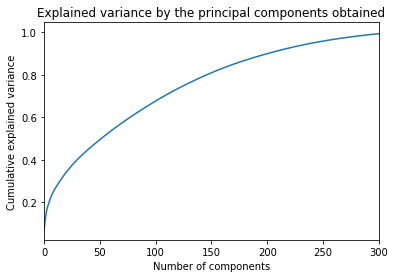

In [129]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,300,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title("Explained variance by the principal components obtained")

Text(0,0.5,'Cumulative explained variance')

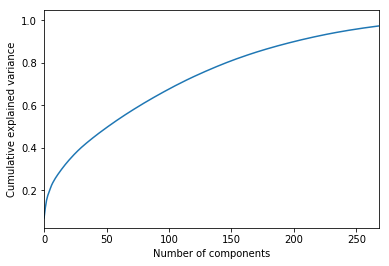

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,268,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [59]:
X_t_train = pca.transform(X_train.todense())
X_t_test = pca.transform(X_test.todense())

In [73]:
X_t_train.shape

(320, 320)

In [74]:

svc_pca_clf = LinearSVC()
svc_pca_clf.fit(X_t_train,y_train)

print(svc_pca_clf.score(X_t_train,y_train))
print(svc_pca_clf.score(X_t_test,y_test))

1.0
1.0


## 2. Text Clustering

## KMEANS

In [75]:
from sklearn.metrics.cluster import homogeneity_score

In [76]:
%%time
pca_2 = PCA()
principal_components = pca_2.fit_transform(X_train.todense())

CPU times: user 8.25 s, sys: 552 ms, total: 8.8 s
Wall time: 4.75 s


In [77]:
principal_components.shape

(320, 320)

In [78]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(principal_components)
y = kmeans.predict(principal_components)


In [79]:

kmeans.cluster_centers_

print("Sum of squared distances of samples to their closest cluster center.",kmeans.inertia_)
print("silhouette_score ",silhouette_score(principal_components,y))

Sum of squared distances of samples to their closest cluster center. 143.36498577851177
silhouette_score  0.02540590162402573


In [80]:
%%time
from scipy.spatial.distance import cdist


cost = np.zeros(20)
agg_scores = []
cluster ={}
distortions =np.zeros(20)
for k in range(5,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(principal_components)
 
    dist = (sum(np.min(cdist(principal_components, kmeans.cluster_centers_, 'euclidean'), axis=1)) / principal_components.shape[0])
    distortions[k] = dist
    
    cost[k] = kmeans.inertia_
    s=silhouette_score(principal_components,kmeans.labels_)
    agg_scores.append((k,s))
    print(k,':',s)
  
    cluster["algorithm"] = "KMeans"
    cluster["labels"] = kmeans.labels_
    cluster["parameters"] = {'n_clusters': k}

5 : 0.01481369126940398
6 : 0.030058439851517703
7 : 0.07383475063236584
8 : 0.02245085339538324
9 : 0.051703689296314394
10 : 0.06432625195934624
11 : 0.044220322676331844
12 : 0.0201700220008946
13 : 0.05370608166229085
14 : 0.026085043505815097
15 : 0.03005698933457106
16 : 0.021308932633072732
17 : 0.033949467462405354
18 : 0.035551638184516864
19 : 0.044475894379369635
CPU times: user 6.91 s, sys: 7.94 s, total: 14.8 s
Wall time: 4 s


In [81]:
print(distortions)

[0.         0.         0.         0.         0.         0.70671981
 0.69937246 0.69524902 0.68940275 0.68218735 0.67885134 0.67799269
 0.67245173 0.66987294 0.66529142 0.66165208 0.66308606 0.65491007
 0.65380921 0.64949742]


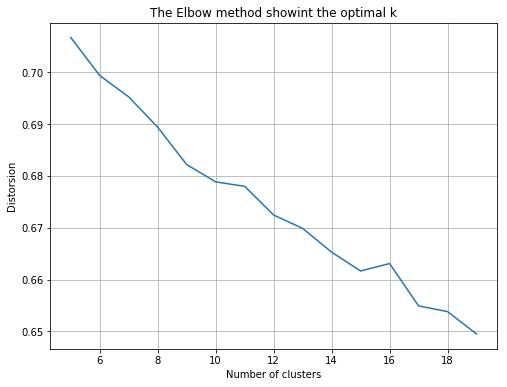

In [82]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(5,20),distortions[5:20])
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Distorsion')
ax.set_title("The Elbow method showing the optimal k")
ax.grid()

## DBSCAN

In [102]:
%%time
# DBSCAN out of the box:
dbscan = DBSCAN(eps=1.1,min_samples=4)
dbscan.fit(principal_components)
unique, counts = np.unique(dbscan.labels_, return_counts=True)
print("clusters:", list(zip(unique, counts)))

clusters: [(-1, 12), (0, 308)]
CPU times: user 95.2 ms, sys: 0 ns, total: 95.2 ms
Wall time: 94.9 ms


In [103]:
type(X_train)

scipy.sparse.csr.csr_matrix

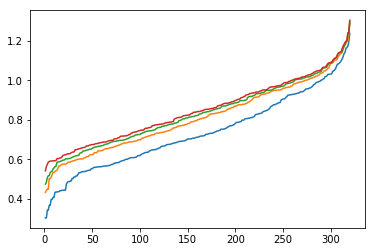

In [104]:
from sklearn.neighbors import NearestNeighbors
for k in range(2,6):
    knn = NearestNeighbors(n_neighbors=k).fit(principal_components)
    distances,indices = knn.kneighbors(principal_components)
    distanceDec = sorted(distances[:,k-1], reverse=False)
    plt.plot(list(range(1,len(X_train.toarray())+1)), distanceDec)
    
    

In [105]:

%%time


clusterings = []

epsilon = np.arange(2, 20, 1)
for e in epsilon:
  cluster = {}
  dbscan = DBSCAN(eps=e,min_samples=2)
  dbscan.fit(X_train)
  cluster["algorithm"] = "DBSCAN"
  cluster["labels"] = dbscan.labels_
  cluster["parameters"] = {'eps': e}
  clusterings.append(cluster)
  
  unique, counts = np.unique(dbscan.labels_, return_counts=True)
  print("eps:",e,"clusters:", list(zip(unique, counts)))

eps: 2 clusters: [(0, 320)]
eps: 3 clusters: [(0, 320)]
eps: 4 clusters: [(0, 320)]
eps: 5 clusters: [(0, 320)]
eps: 6 clusters: [(0, 320)]
eps: 7 clusters: [(0, 320)]
eps: 8 clusters: [(0, 320)]
eps: 9 clusters: [(0, 320)]
eps: 10 clusters: [(0, 320)]
eps: 11 clusters: [(0, 320)]
eps: 12 clusters: [(0, 320)]
eps: 13 clusters: [(0, 320)]
eps: 14 clusters: [(0, 320)]
eps: 15 clusters: [(0, 320)]
eps: 16 clusters: [(0, 320)]
eps: 17 clusters: [(0, 320)]
eps: 18 clusters: [(0, 320)]
eps: 19 clusters: [(0, 320)]
CPU times: user 18.1 s, sys: 84.1 ms, total: 18.2 s
Wall time: 18 s


In [106]:
lista = list(zip(unique, counts))

In [130]:
# x,y = zip(*lista)

# plt.scatter(x,y)
# plt.show()

In [108]:
X_train.shape

(320, 94967)

In [109]:
# db_cluster = DBSCAN(eps=9.7, min_samples=2, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2)
# arr = db_cluster.fit_predict(X_train)
# print("Clusters assigned are:", set(db_cluster.labels_))

# uni, counts = np.unique(arr, return_counts=True)
# d = list[zip(uni, counts)]
# print(d)

In [110]:
X_train

<320x94967 sparse matrix of type '<class 'numpy.float64'>'
	with 1673200 stored elements in Compressed Sparse Row format>

In [121]:
%%time

agg = AgglomerativeClustering(linkage="ward",n_clusters=20)
clustering_agg =agg.fit(X_train.todense())
s=silhouette_score(X_train,agg.labels_)
print(s)

print(clustering_agg.labels_)
cluster["algorithm"] = "Agglomerative"
cluster["labels"] = agg.labels_
cluster["parameters"] = {'n_clusters': 20}


0.03786548339120058
[11  1  1  3 15  5 13 13  5  5 13  1  2  5 11  2  5  3 11  8  2  2 15 15
  3  2  5  3  0  3 14  2  0  2  3  5 14  3  3  2  2  4  5 12 11  5  2 17
 19  3  0  3  3  2  4  8  9  4  6  1  3  5 11  0  3  3 11 11  2  3 15 10
  3  5 13  9 11  5 17 15  9  5 19  1  3 16  3  2  8  0  0 15  2 17  3 17
  6  6  7  5 17  0 15  0 15  2  6 17  9  2  3  2  3  3  2  3  6  2  3  7
  5  5  5 19  5  0  8  0  3 13 16  2 19  2 16  3 11 13  3  2 16 12  4  1
  2  1  2  2  0 13  1 11  0 17 11 10  0 11  3  2  3  5 11  3 15  8  3  3
  2  0  3  9 11  9  3  2  0  5  9  9  3 15  1  3  0  2  2 15  8  3 15  2
 18 15 17  5  0  0  5  0  2 14 16  3  2  0  0  8  3  1  6  8  9  5 19  2
  7  8  9 11  1  3  1  5  2  5 13 13  2  0  3  1  2 13 16 17  2  8  9  5
  0  3  4  3 16  3 17  9  5 17  2  8  2  5  5  3  9  3  2  0  5  2  2 18
  5  2  2  5  2  0  2  5  3  5  5  2  8  0  9  2 13 11  2 11  3  3  1  3
  3  2  1 17  3  2  3 17  3 17  5  3  2  0  0  6  5  2 12 15  9  2  1  7
  3 15  9 15  3  2  3  3]
CPU t

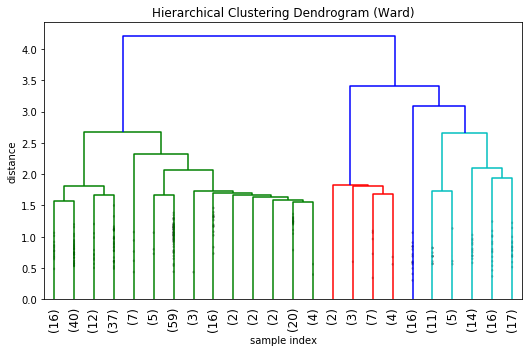

In [126]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_train.todense(), 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

In [ ]:
print(cluster)